In [10]:
%pylab inline
from sklearn.naive_bayes import GaussianNB
from distribuciones import paralelo, diagonal, espirales_anidadas
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from random import sample
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from random import sample

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/agus/IntroML/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['sample', 'clf', 'diagonal']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


3) Para el algoritmo Naive-Bayes con histogramas vamos a usar la implementacion de CategoricalNB de Sklearn. Para poder usarla primero tenemos que convertir nuestras variables continuas en categóricas, o sea en un histograma, usando un discretizador. Desarrolle una función que entrene un clasificador Naive-Bayes con histogramas, usando un conjunto de validación para determinar el número óptimo de bins del histograma. Las opciones para el clasificador y el discretizador son las siguientes:

In [2]:
df = pd.read_csv('../tp2/dos_elipses.data')
df.columns = ['x','y','clase']

x = df.iloc[:,:2]
clase = df.iloc[:,2]

In [11]:
# discretizador.bin_edges_  #ver limites del bineado

array([array([-0.498016 , -0.3982175, -0.298419 , -0.1986205, -0.098822 ,
               0.0009765,  0.100775 ,  0.2005735,  0.300372 ,  0.4001705,
               0.499969 ])                                               ,
       array([-4.999690e-01, -4.000545e-01, -3.001400e-01, -2.002255e-01,
              -1.003110e-01, -3.965000e-04,  9.951800e-02,  1.994325e-01,
               2.993470e-01,  3.992615e-01,  4.991760e-01])              ],
      dtype=object)

In [3]:
bins = 5
discretizador = KBinsDiscretizer(n_bins = bins, encode='ordinal',strategy='uniform')
discretizador.fit(x)
x_discreto = discretizador.transform(x)

clf = CategoricalNB(min_categories=bins)
clf.fit(x_discreto,clase)

CategoricalNB(min_categories=5)

In [4]:
prediccion_training = clf.predict(x_discreto)
correctos, = np.where(prediccion_training == clase)
print('accuracy',len(correctos)/len(clase))

accuracy 0.8608608608608609


In [31]:
def NBfunction(bines,x_train,y_train,x_val,y_val,x_test,y_test):
    
    error_train = []; error_val = []; error_test = []
    
    for bins in bines:
        best_bins = -99
        best_accuracy = -99
    # convierto variables
    
        discretizador = KBinsDiscretizer(n_bins = bins, encode='ordinal',strategy='uniform')
        discretizador.fit(x_train)
        x_train_disc = discretizador.transform(x_train)
        x_val_disc   = discretizador.transform(x_val)
        x_test_disc  = discretizador.transform(x_test)
    
    # entreno el clasificador
    
        clf = CategoricalNB(min_categories=bins)
        clf.fit(x_train_disc,y_train)
        
    # compruebo error
    
        prediccion_training = clf.predict(x_train_disc)
        correctos, = np.where(prediccion_training == y_train)
        accuracy_train = len(correctos)/len(y_train)
        
        prediccion_validation = clf.predict(x_val_disc)
        correctos, = np.where(prediccion_validation == y_val)
        accuracy_val = len(correctos)/len(y_val)
        
        prediccion_test = clf.predict(x_test_disc)
        correctos, = np.where(prediccion_test == y_test)
        accuracy_test = len(correctos)/len(y_test)
        
        if accuracy_train > best_accuracy:
            best_accuracy = accuracy_train
            best_clf = clf
            best_bins = bins
            
        error_train.append(1-accuracy_train)
        error_val.append(1-accuracy_val)
        error_test.append(1-accuracy_test)
        
    return error_train, error_val, error_test, best_clf, best_bins

In [32]:
df = pd.read_csv('../tp2/dos_elipses.data')
df.columns = ['x','y','clase']

x = df.iloc[:,0]
y = df.iloc[:,1]
clase = df.iloc[:,2]

neuronas = 6
lrate = 0.1   # 0.1, 0.01, 0.001
pmom  = 0.9   # 0, 0.5, 0.9
ndata = 500
ntrain = 400
nvalid = 100
ntest = 2000
nevaluaciones = 300
nepocas = 50

# selecciono 500 datos para trabajar

seleccion = sample(list(np.arange(len(x))),ndata)
xdata = x[seleccion]
ydata = y[seleccion]

# separo en train y validation

train_mask = sample(list(np.arange(ndata)),ntrain)
valid_mask = np.delete(np.arange(ndata),train_mask)

r_train = df.iloc[train_mask,:2]
c_train = df.iloc[train_mask,2]

r_valid = df.iloc[valid_mask,:2]
c_valid = df.iloc[valid_mask,2]

df_test = pd.read_csv('../tp2/dos_elipses.test')
df_test.columns = ['x','y','clase']

r_test = df_test.iloc[:,:2]
c_test = df_test.iloc[:,2]

In [45]:
bines = np.arange(2,500)

error_train, error_val, error_test, best_clf, best_bins = NBfunction(bines,r_train,c_train,r_valid,c_valid,r_test,c_test)

[]

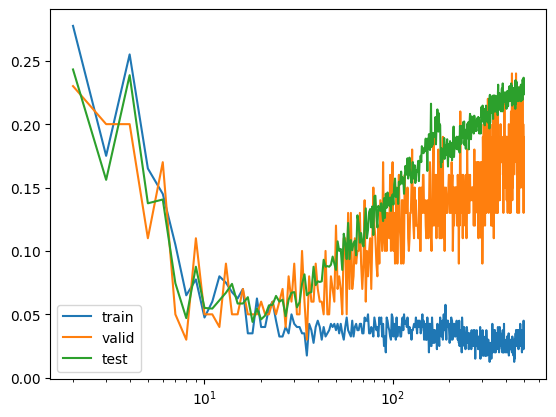

In [47]:
plt.plot(bines,error_train,label='train')
plt.plot(bines,error_val,label='valid')
plt.plot(bines,error_test,label='test')
plt.legend()
plt.semilogx()

In [49]:
array = np.zeros([5,5])
for i in discretizador.transform(x):
    binx = int(i[0])
    biny = int(i[1])
    
    array[binx,biny] = array[binx,biny] + 1 

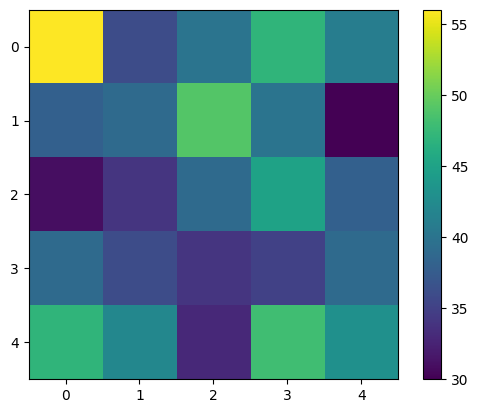

In [50]:
plt.imshow(array)
plt.colorbar()

In [ ]:
def NBfunction(bins,x_train,y_train,x_val,y_val,x_test,y_test):
    
    # convierto variables
    discretizador = KBinsDiscretizer(n_bins = bins, encode='ordinal',strategy='uniform')
    discretizador.fit(x_train)
    
    
    

bins=5

discretizador = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')


#código propio


clf = CategoricalNB(min_categories=bins)

clf.fit(X_discreto,y_train)

mas codigo propio


La función es similar a la que hicieron para entrenar redes. Tiene que recibir los conjuntos de entrenamiento, validación y test, el discretizador y el clasificador, y los valores a probar del número de bins, y tiene que devolver los errores para hacer curvas de error versus número de bins, y el discretizador y el clasificador óptimo entrenados.